In [1]:
import argparse, os, csv, numpy as np
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Dropout, Input, Flatten, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras import optimizers
from random import shuffle
from PIL import Image
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from keras.losses import mean_squared_error
from sklearn.model_selection import cross_val_score
from keras.preprocessing.image import ImageDataGenerator

/home/hackathon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
a1 = Input(shape=(4,))
a = Dense(256)(a1)
x = Dense(512, activation='relu')(a)
pred1 = Dense(2)(x)
pred2 = Dense(2)(x)
model = Model(inputs=a1, outputs=[pred1, pred2])
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss=mean_squared_error, optimizer=sgd, metrics=['accuracy'])

In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 256)          1280        input_3[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 512)          131584      dense_9[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 2)            1026        dense_10[0][0]                   
__________________________________________________________________________________________________
dense_12 (

In [19]:
x = np.random.randint(4, size=(100,4))
y1 = np.random.randint(0, 5, size=(100, 2))
y2 = np.random.randint(6,10, size=(100, 2))

In [20]:
history = model.fit(x,[y1, y2], epochs=10)

Epoch 1/10
100/100 [==============================] - 0s 620us/step - loss: 41.3995 - dense_11_loss: 4.3508 - dense_12_loss: 37.0488 - dense_11_acc: 0.6400 - dense_12_acc: 0.4000
Epoch 2/10
100/100 [==============================] - 0s 75us/step - loss: 10.1482 - dense_11_loss: 2.5766 - dense_12_loss: 7.5716 - dense_11_acc: 0.5500 - dense_12_acc: 0.4600
Epoch 3/10
100/100 [==============================] - 0s 76us/step - loss: 9.1202 - dense_11_loss: 2.4686 - dense_12_loss: 6.6516 - dense_11_acc: 0.6700 - dense_12_acc: 0.5900
Epoch 4/10
100/100 [==============================] - 0s 83us/step - loss: 9.1603 - dense_11_loss: 2.3452 - dense_12_loss: 6.8151 - dense_11_acc: 0.5600 - dense_12_acc: 0.4100
Epoch 5/10
100/100 [==============================] - 0s 93us/step - loss: 8.0232 - dense_11_loss: 2.2523 - dense_12_loss: 5.7709 - dense_11_acc: 0.6600 - dense_12_acc: 0.4900
Epoch 6/10
100/100 [==============================] - 0s 83us/step - loss: 8.0281 - dense_11_loss: 2.2229 - dense_12

dict_keys(['loss', 'dense_11_loss', 'dense_12_loss', 'dense_11_acc', 'dense_12_acc'])


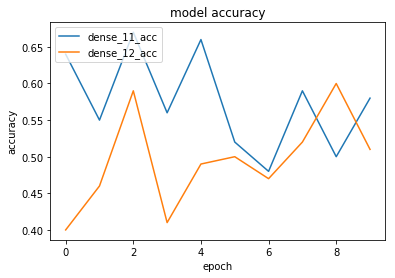

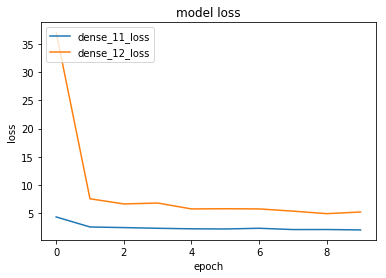

In [22]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dense_11_acc'])
plt.plot(history.history['dense_12_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dense_11_acc', 'dense_12_acc'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['dense_11_loss'])
plt.plot(history.history['dense_12_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['dense_11_loss', 'dense_12_loss'], loc='upper left')
plt.show()